In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('data/lena.png')

## 模糊

In [15]:
img_blur = img.copy()
img_blur = cv2.GaussianBlur(img_blur, (5, 5), 0)
img_blur = cv2.GaussianBlur(img_blur, (5, 5), 0)
img_blur = cv2.GaussianBlur(img_blur, (5, 5), 0)

In [16]:
img_show = np.hstack((img, img_blur))

In [17]:
cv2.imshow('image', img_show)
cv2.waitKey(0)
cv2.destroyAllWindows()

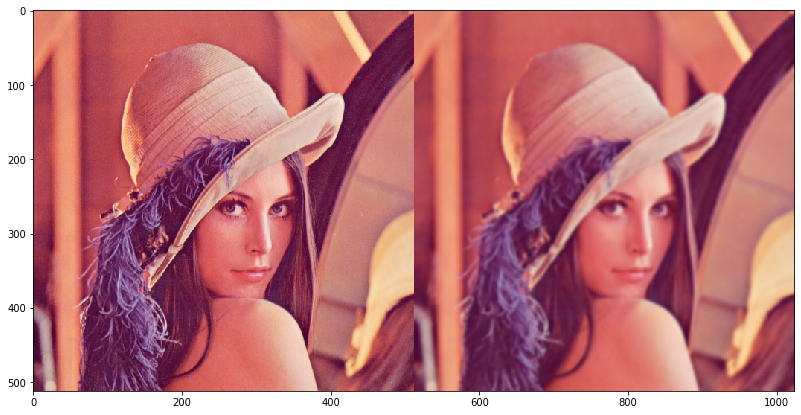

In [18]:
plt.figure(figsize=(14,7))
plt.imshow(img_show[:,:,::-1])

## 邊緣檢測

In [19]:
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [20]:
img_sobel_x = cv2.Sobel(img_grey, cv2.CV_16S, dx=1, dy=0, ksize=3)
img_sobel_x = cv2.convertScaleAbs(img_sobel_x)
img_sobel_y = cv2.Sobel(img_grey, cv2.CV_16S, dx=0, dy=1, ksize=3)
img_sobel_y = cv2.convertScaleAbs(img_sobel_y)
img_sobel_combine = cv2.addWeighted(img_sobel_x, 0.5, img_sobel_y, 0.5, 0)

In [21]:
img_show = np.hstack((img_sobel_x, img_sobel_y, img_sobel_combine))

In [22]:
cv2.imshow('image', img_show)
cv2.waitKey(0)
cv2.destroyAllWindows()

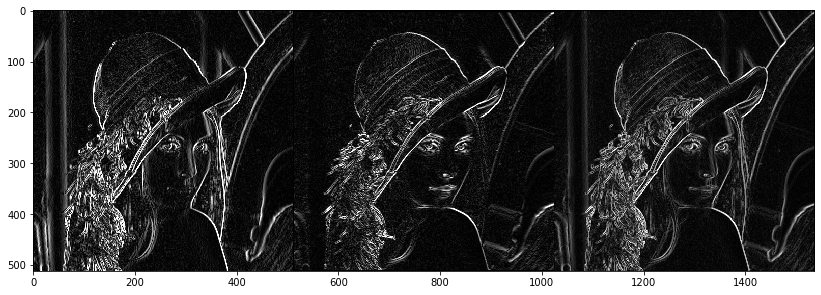

In [23]:
plt.figure(figsize=(14,7))
plt.imshow(img_show, cmap='gray')

## 比較 Sobel 如果在 uint8 的情況下做會 overflow 的狀況

In [26]:
# 對 x 方向直接以非負整數的資料格式 (uint8) 進行 Sobel 邊緣檢測
img_sobel_x_uint8 =  cv2.Sobel(img_grey, cv2.CV_8U, dx=1, dy=0, ksize=3)

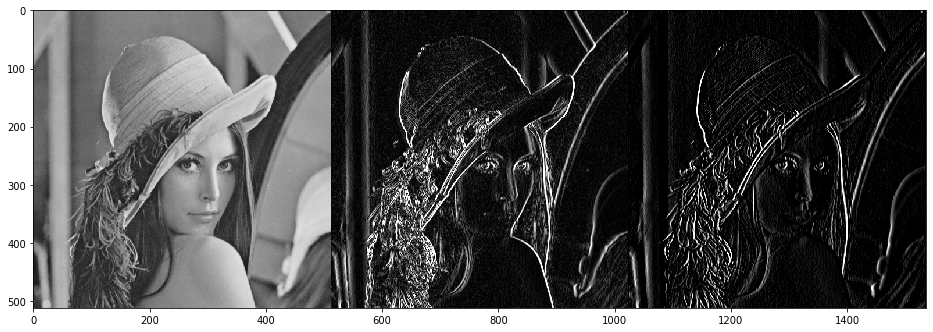

In [30]:
img_show = np.hstack((img_grey, img_sobel_x, img_sobel_x_uint8))
plt.figure(figsize=(16,7))
plt.imshow(img_show, cmap='gray')

## 比較一次與兩次計算偏微分的結果

In [31]:
img_sobel_xx = cv2.Sobel(img_grey, cv2.CV_16S, dx=2, dy=0, ksize=3)
img_sobel_xx = cv2.convertScaleAbs(img_sobel_xx)

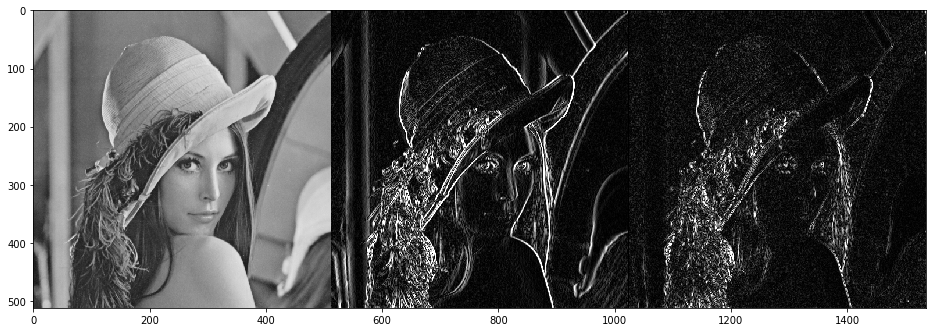

In [32]:
img_show = np.hstack((img_grey, img_sobel_x, img_sobel_xx))
plt.figure(figsize=(16,7))
plt.imshow(img_show, cmap='gray')